# Semana 1 - Leitura e Tratamento dos Dados

## Importando dados

In [1]:
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

In [2]:
uri = 'https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json'
dados = pd.read_json(uri)
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## Verificando o conteúdo das primeiras colunas

In [3]:
dados[['customerID', 'Churn']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
dtypes: object(2)
memory usage: 113.7+ KB


In [4]:
print(dados.customerID.value_counts())
print(dados.Churn.value_counts())

0002-ORFBO    1
6614-VBEGU    1
6637-KYRCV    1
6635-MYYYZ    1
6635-CPNUN    1
             ..
3374-TTZTK    1
3374-PZLXD    1
3374-LXDEV    1
3373-YZZYM    1
9995-HOTOH    1
Name: customerID, Length: 7267, dtype: int64
No     5174
Yes    1869
        224
Name: Churn, dtype: int64


Há uma categoria sem label na coluna Churn. As observações serão removidas.

In [5]:
dados = dados.query('Churn != ""')
dados.reset_index(drop=True, inplace=True)
dados.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

## Normalizando os nós json


fazer as análises de inconsistências<br>

In [6]:
dados_customer = pd.json_normalize(dados.customer)
dados_customer.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9


In [7]:
dados_phone = pd.json_normalize(dados.phone)
dados_phone.head(2)

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes


In [8]:
dados_internet = pd.json_normalize(dados.internet)
dados_internet.head(2)

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes


In [9]:
dados_account = pd.json_normalize(dados.account)
dados_account.head(2)

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4


### Concatenando as colunas normalizadas

In [10]:
def normalizar(dados):
    json_normalizado = pd.DataFrame()
    for coluna in dados.columns[2:]:
        json_normalizado = pd.concat([json_normalizado, pd.json_normalize(dados[coluna])], axis='columns')

    return pd.concat([dados[['customerID', 'Churn']], json_normalizado], axis='columns')

In [11]:
dados_normalizados = normalizar(dados=dados)
dados_normalizados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## Traduzindo colunas

In [12]:
rename = {
    'customerID':'id_cliente',
    'Churn':'churn',
    'gender':'genero',
    'SeniorCitizen':'idoso',
    'Partner':'possui_parceiro',
    'Dependents':'possui_dependentes',
    'tenure':'meses_contrato',
    'PhoneService':'assina_telefone',
    'MultipleLines':'linhas_multiplas',
    'InternetService':'aasinatura_provedor_internet',
    'OnlineSecurity':'assinatura_seguranca',
    'OnlineBackup':'assinatura_backup',
    'DeviceProtection':'assinatura_protecao_dispositivo',
    'TechSupport':'assinatura_suporte_tecnico', 
    'StreamingTV':'assinatura_tv_cabo', 
    'StreamingMovies':'assinatura_streaming_filmes',
    'Contract':'tipo_contrato', 
    'PaperlessBilling':'fatura_online', 
    'PaymentMethod':'forma_pagamento', 
    'Charges.Monthly':'valor_fatura_mensal',
    'Charges.Total':'valor_total_pago'
}

dados_normalizados = dados_normalizados.rename(columns=rename)
dados_normalizados.head(2)

,id_cliente,churn,genero,idoso,possui_parceiro,possui_dependentes,meses_contrato,assina_telefone,linhas_multiplas,aasinatura_provedor_internet,assinatura_seguranca,assinatura_backup,assinatura_protecao_dispositivo,assinatura_suporte_tecnico,assinatura_tv_cabo,assinatura_streaming_filmes,tipo_contrato,fatura_online,forma_pagamento,valor_fatura_mensal,valor_total_pago
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4


## Análise inconsistência nos dados

In [13]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id_cliente                       7043 non-null   object 
 1   churn                            7043 non-null   object 
 2   genero                           7043 non-null   object 
 3   idoso                            7043 non-null   int64  
 4   possui_parceiro                  7043 non-null   object 
 5   possui_dependentes               7043 non-null   object 
 6   meses_contrato                   7043 non-null   int64  
 7   assina_telefone                  7043 non-null   object 
 8   linhas_multiplas                 7043 non-null   object 
 9   aasinatura_provedor_internet     7043 non-null   object 
 10  assinatura_seguranca             7043 non-null   object 
 11  assinatura_backup                7043 non-null   object 
 12  assinatura_protecao_

In [14]:
for coluna in dados_normalizados.columns:
    print(dados_normalizados[coluna].value_counts())
    print('---------------------------------------')

0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: id_cliente, Length: 7043, dtype: int64
---------------------------------------
No     5174
Yes    1869
Name: churn, dtype: int64
---------------------------------------
Male      3555
Female    3488
Name: genero, dtype: int64
---------------------------------------
0    5901
1    1142
Name: idoso, dtype: int64
---------------------------------------
No     3641
Yes    3402
Name: possui_parceiro, dtype: int64
---------------------------------------
No     4933
Yes    2110
Name: possui_dependentes, dtype: int64
---------------------------------------
1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
9     119
70    119
12    117
10    116
6     110
13    109
68    100
15     99
11     99
67     98
18     97
69     95
24     94
22     90
66     89
35     88
17     87
23 

A variável valor_total_pago possui 11 ocorrências sem labels.

In [15]:
dados_normalizados.query("valor_total_pago == ' '")

,id_cliente,churn,genero,idoso,possui_parceiro,possui_dependentes,meses_contrato,assina_telefone,linhas_multiplas,aasinatura_provedor_internet,assinatura_seguranca,assinatura_backup,assinatura_protecao_dispositivo,assinatura_suporte_tecnico,assinatura_tv_cabo,assinatura_streaming_filmes,tipo_contrato,fatura_online,forma_pagamento,valor_fatura_mensal,valor_total_pago
945,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1731,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1906,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2025,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2176,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2250,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2855,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3052,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3118,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4054,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


Nota-se que a coluna meses_contrato é igual 0 para os casos filtrados, portanto são clientes que ainda não pagaram nenhum valor à empresa.

In [16]:
# Filtrando valor_total_pago vazio
dados_normalizados.query("valor_total_pago == ' '")[['meses_contrato', 'valor_fatura_mensal', 'valor_total_pago']]

,meses_contrato,valor_fatura_mensal,valor_total_pago
945,0,56.05,
1731,0,20.00,
1906,0,61.90,
2025,0,19.70,
2176,0,20.25,
2250,0,25.35,
2855,0,73.35,
3052,0,25.75,
3118,0,52.55,
4054,0,80.85,


In [17]:
# Filtrando meses_contrato igual a zero
dados_normalizados.query("meses_contrato == 0")[['meses_contrato', 'valor_fatura_mensal', 'valor_total_pago']]

,meses_contrato,valor_fatura_mensal,valor_total_pago
945,0,56.05,
1731,0,20.00,
1906,0,61.90,
2025,0,19.70,
2176,0,20.25,
2250,0,25.35,
2855,0,73.35,
3052,0,25.75,
3118,0,52.55,
4054,0,80.85,


Como as condições retornam o mesmo resultado, podemos preencher o valor_total_pago com o valor_fatura_mensal, para meses_contrato igual a zero.

In [18]:
selecao = dados_normalizados.query("meses_contrato == 0").index
dados_normalizados.loc[selecao, 'valor_total_pago'] = 0
dados_normalizados.query("meses_contrato == 0")[['meses_contrato', 'valor_fatura_mensal', 'valor_total_pago']]

,meses_contrato,valor_fatura_mensal,valor_total_pago
945,0,56.05,0
1731,0,20.00,0
1906,0,61.90,0
2025,0,19.70,0
2176,0,20.25,0
2250,0,25.35,0
2855,0,73.35,0
3052,0,25.75,0
3118,0,52.55,0
4054,0,80.85,0


Além disso, a coluna valor_total_pago está como tipo object e é necessário converter para float.

In [19]:
dados_normalizados.valor_total_pago = dados_normalizados.valor_total_pago.astype('float64')
dados_normalizados.valor_total_pago.dtypes

dtype('float64')

#### Coluna de gastos diários

In [20]:
dados_normalizados['valor_gasto_diario'] = round((dados_normalizados.valor_fatura_mensal / 30),2)
dados_normalizados[['meses_contrato', 'valor_fatura_mensal', 'valor_total_pago', 'valor_gasto_diario']]

,meses_contrato,valor_fatura_mensal,valor_total_pago,valor_gasto_diario
0,9,65.60,593.30,2.19
1,9,59.90,542.40,2.00
2,4,73.90,280.85,2.46
3,13,98.00,1237.85,3.27
4,3,83.90,267.40,2.80
...,...,...,...,...
7038,13,55.15,742.90,1.84
7039,22,85.10,1873.70,2.84
7040,2,50.30,92.75,1.68
7041,67,67.85,4627.65,2.26


# Semana 2 - Análise Exploratória

### Bibliotecas


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('Accent')
sns.set_style('darkgrid')

### Distribuição da variável Churn

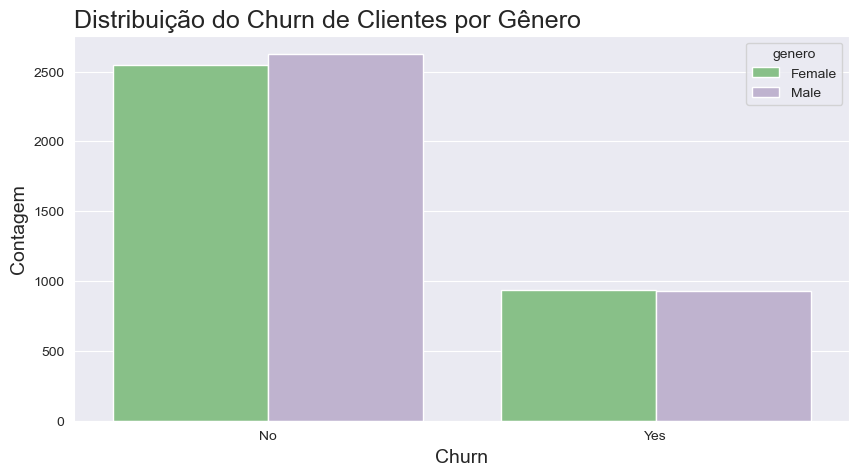

In [22]:
ax = sns.countplot(data=dados_normalizados,
                   x='churn',
                   hue='genero')
ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição do Churn de Clientes por Gênero', fontsize=18, loc='left')
ax.set_xlabel('Churn', fontsize=14)
ax.set_ylabel('Contagem', fontsize=14)
ax=ax

Nota-se que não há diferença significativa entre o churn para ambos os gêneros.

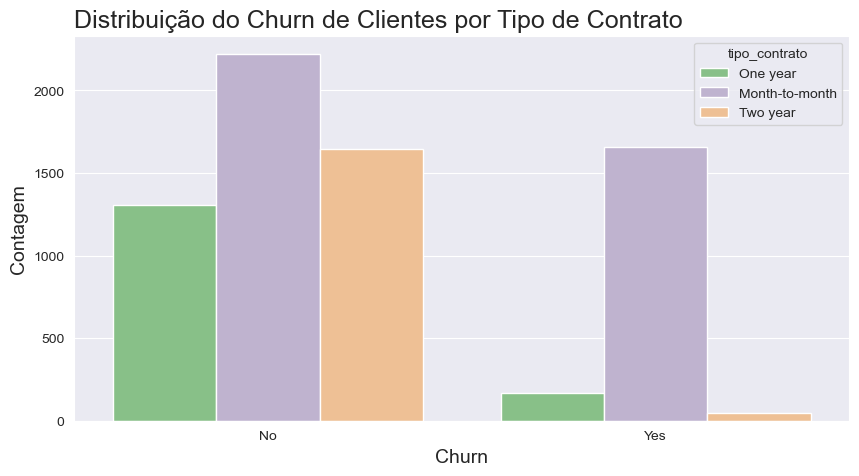

In [23]:
ax = sns.countplot(data=dados_normalizados,
                   x='churn',
                   hue='tipo_contrato')
ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição do Churn de Clientes por Tipo de Contrato', fontsize=18, loc='left')
ax.set_xlabel('Churn', fontsize=14)
ax.set_ylabel('Contagem', fontsize=14)
ax=ax

Nota-se maior cancelamento de contratos para clientes com contratos mensais.

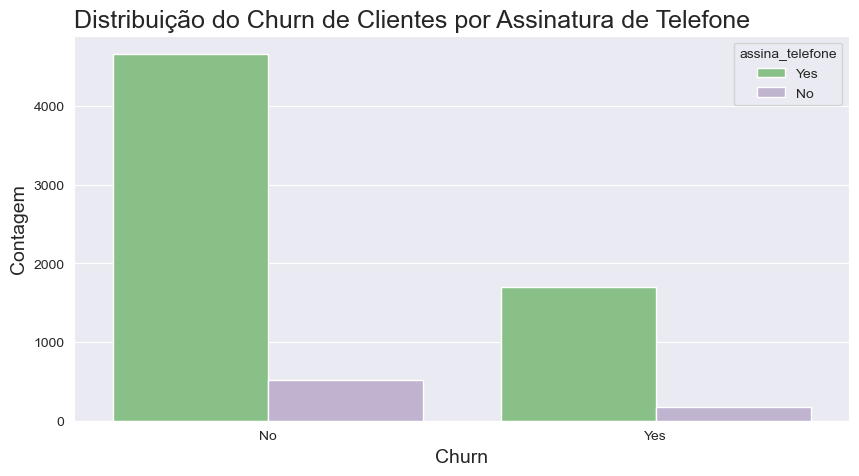

In [24]:
ax = sns.countplot(data=dados_normalizados,
                   x='churn',
                   hue='assina_telefone')
ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição do Churn de Clientes por Assinatura de Telefone', fontsize=18, loc='left')
ax.set_xlabel('Churn', fontsize=14)
ax.set_ylabel('Contagem', fontsize=14)
ax=ax

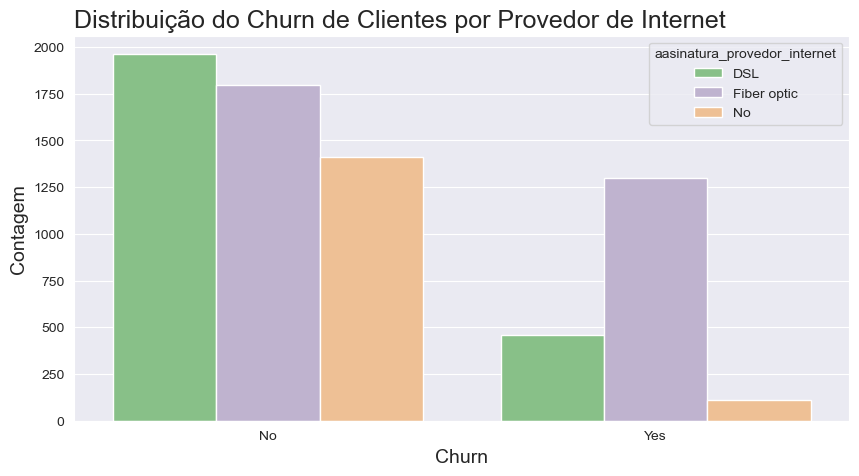

In [25]:
ax = sns.countplot(data=dados_normalizados,
                   x='churn',
                   hue='aasinatura_provedor_internet')
ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição do Churn de Clientes por Provedor de Internet', fontsize=18, loc='left')
ax.set_xlabel('Churn', fontsize=14)
ax.set_ylabel('Contagem', fontsize=14)
ax=ax

Nota-se uma maior tendência de churn para clientes com o serviço de fibra óptica.

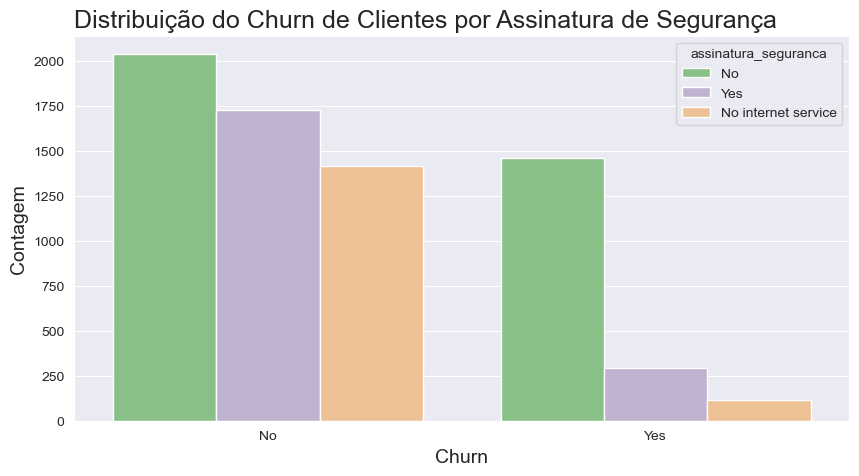

In [26]:
ax = sns.countplot(data=dados_normalizados,
                   x='churn',
                   hue='assinatura_seguranca')
ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição do Churn de Clientes por Assinatura de Segurança', fontsize=18, loc='left')
ax.set_xlabel('Churn', fontsize=14)
ax.set_ylabel('Contagem', fontsize=14)
ax=ax

Também percebe-se uma maior saída da empresa em clientes que não possuem serviço de segurança online.

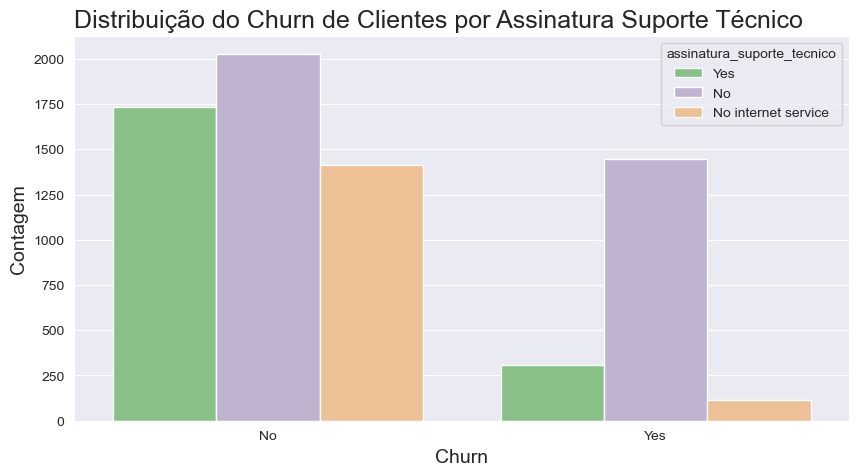

In [27]:
ax = sns.countplot(data=dados_normalizados,
                   x='churn',
                   hue='assinatura_suporte_tecnico')
ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição do Churn de Clientes por Assinatura Suporte Técnico', fontsize=18, loc='left')
ax.set_xlabel('Churn', fontsize=14)
ax.set_ylabel('Contagem', fontsize=14)
ax=ax

Assim como no serviço de segurança, a ausência do suporte técnico também está presente em maior churn.

### Churn x Valores Pagos

In [28]:
dados_normalizados.groupby(by='churn')\
                   [['valor_fatura_mensal', 'valor_total_pago', 'valor_gasto_diario']]\
                   .agg(['mean', 'std', 'median'])\
                   .round(2)

valor_fatura_mensal               valor_total_pago                    \
                     mean    std median             mean      std   median   
churn                                                                        
No                  61.27  31.09  64.43          2549.91  2329.95  1679.52   
Yes                 74.44  24.67  79.65          1531.80  1890.82   703.55   

      valor_gasto_diario               
                    mean   std median  
churn                                  
No                  2.04  1.04   2.15  
Yes                 2.48  0.82   2.66

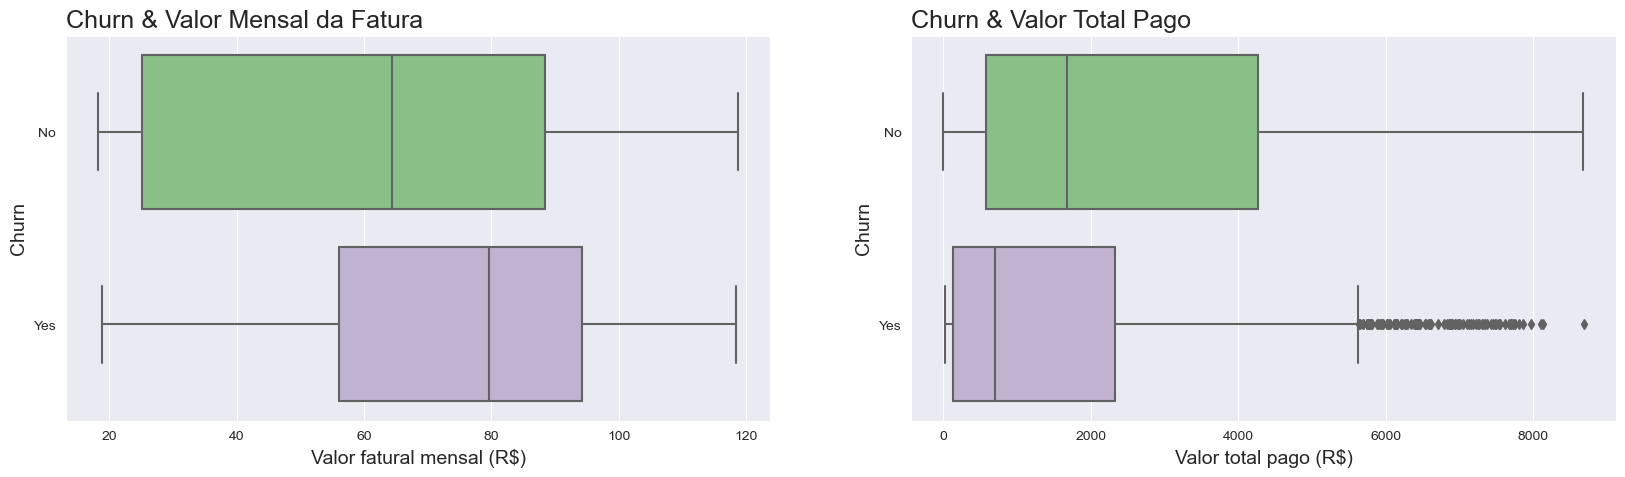

In [29]:
fig, axs = plt.subplots(1,2,figsize=(20,5))

sns.boxplot(x='valor_fatura_mensal',y='churn',data=dados_normalizados, ax=axs[0])
sns.boxplot(x='valor_total_pago',y='churn',data=dados_normalizados, ax=axs[1])

axs[0].set_title('Churn & Valor Mensal da Fatura', fontsize=18, loc='left')
axs[0].set_xlabel('Valor fatural mensal (R$)', fontsize=14)
axs[0].set_ylabel('Churn', fontsize=14)
axs[1].set_title('Churn & Valor Total Pago', fontsize=18, loc='left')
axs[1].set_xlabel('Valor total pago (R$)', fontsize=14)
axs[1].set_ylabel('Churn', fontsize=14)

plt.show()

Analisando em relação ao valor da fatura mensal, nota-se que os clientes que deixaram a empresa tem faturas com valores maiores e mais concentradas em **R$80,00**. Já os clientes que permancem com o contrato, possuem faturas com valores menores.<br>

Observando o valor total pago, clientes que encerraram o contrato têm um valor pago acumulado menor, indicando uma possível menor permanência com a empresa.

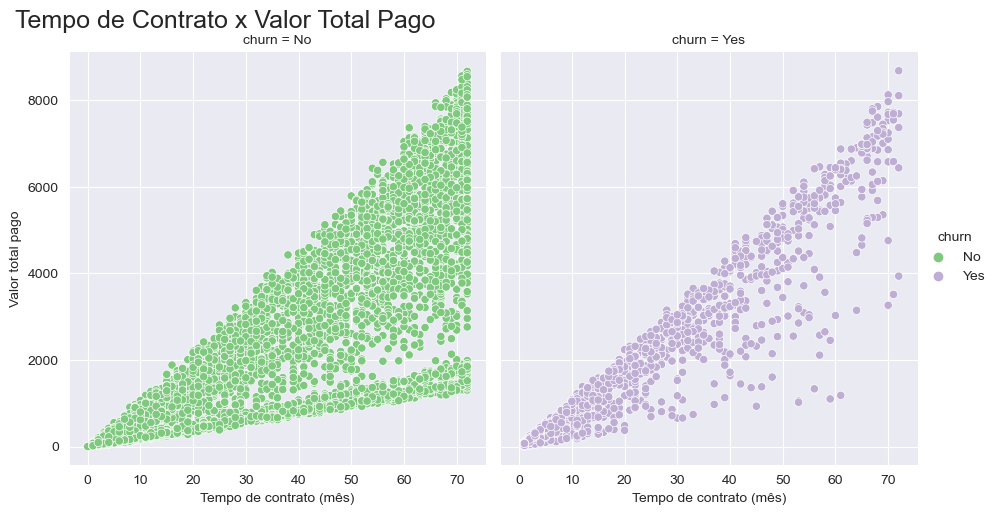

In [30]:
ax=sns.relplot(x='meses_contrato', y='valor_total_pago', hue='churn', col='churn', data=dados_normalizados)
ax.figure.set_size_inches(10,5)
ax.fig.suptitle('Tempo de Contrato x Valor Total Pago', fontsize=18, x=0.23,y=1.02)
ax.set(xlabel='Tempo de contrato (mês)', ylabel='Valor total pago')
ax=ax

Pode-se notar que nos clientes que saíram da empresa, à medida que o tempo de contrato aumenta, há cada vez menos observações. Já na outra situação de churn, a quantidade de clientes é mais constante com o aumento de tempo.

#### Testes de Hipóteses

In [31]:
from scipy.stats import normaltest
significancia = 0.05

Verificando a normalidade das distribuições

In [32]:
_, pvalor_mensal = normaltest(dados_normalizados.valor_fatura_mensal)
if pvalor_mensal <= significancia:
  print(f'p_valor = {pvalor_mensal}. Hipótese nula rejeitada e a distribuição não vem de uma normal.')
else:
  print(f'p_valor = {pvalor_mensal}. Hipótese nula não rejeitada e a distribuição vem de uma normal.')

p_valor = 0.0. Hipótese nula rejeitada e a distribuição não vem de uma normal.


In [33]:
_, pvalor_total = normaltest(dados_normalizados.valor_total_pago)
if pvalor_total <= significancia:
  print(f'p_valor = {pvalor_total}. Hipótese nula rejeitada e a distribuição não vem de uma normal.')
else:
  print(f'p_valor = {pvalor_total}. Hipótese nula não rejeitada e a distribuição vem de uma normal.')

p_valor = 2.6049140547884828e-176. Hipótese nula rejeitada e a distribuição não vem de uma normal.


In [34]:
churn_sim_mensal = dados_normalizados.query('churn == "Yes"')['valor_fatura_mensal']
churn_nao_mensal = dados_normalizados.query('churn == "No"')['valor_fatura_mensal']

churn_sim_total = dados_normalizados.query('churn == "Yes"')['valor_total_pago']
churn_nao_total = dados_normalizados.query('churn == "No"')['valor_total_pago']

##### Teste 1 - Testar se o valor da fatura mensal dos clientes que fizeram churn é, em média, estatiscamente maior do que os clientes que não fizeram.

**H<sup>null</sup>**
> **A distribuição do valor da fatura mensal é igual para os clientes que fizeram churn e não fizeram.**

**H<sup>alt</sup>**
> **A distribuição do valor da fatura mensal é maior para os clientes que fizeram churn.**

In [35]:
from scipy.stats import mannwhitneyu

_, pvalor_teste1 = mannwhitneyu(churn_sim_mensal, churn_nao_mensal, alternative='greater')

if pvalor_teste1 <= significancia:
  print(f'p_valor = {pvalor_teste1}. Hipótese nula rejeitada e pode-se afirmar que a mensalidade dos clientes que fizeram churn são estatisticamente superiores, a 95% de confiança.')
else:
  print(f'p_valor = {pvalor_total}. Hipótese nula não rejeitada e não se pode afirmar que as distribuições são diferentes, a 95% de confiança.')

p_valor = 1.6558138259942924e-54. Hipótese nula rejeitada e pode-se afirmar que a mensalidade dos clientes que fizeram churn são estatisticamente superiores, a 95% de confiança.


##### Teste 2 - Testar se o valor total pago pelos clientes que fizeram churn é, em média, estatiscamente menor do que os clientes que não fizeram.

**H<sup>null</sup>**
> **A distribuição do valor total pago é igual para os clientes que fizeram churn e não fizeram.**

**H<sup>alt</sup>**
> **A distribuição do valor total pago é menor para os clientes que fizeram churn.**

In [36]:
_, pvalor_teste2 = mannwhitneyu(churn_sim_total, churn_nao_total, alternative='less')

if pvalor_teste2 <= significancia:
  print(f'p_valor = {pvalor_teste2}. Hipótese nula rejeitada e pode-se afirmar que o valor total pago pelos clientes que fizeram churn são estatisticamente menores, a 95% de confiança.')
else:
  print(f'p_valor = {pvalor_teste2}. Hipótese nula não rejeitada e não se pode afirmar que as distribuições são diferentes, a 95% de confiança.')

p_valor = 2.842516933103657e-83. Hipótese nula rejeitada e pode-se afirmar que o valor total pago pelos clientes que fizeram churn são estatisticamente menores, a 95% de confiança.


In [37]:
dados_normalizados[['id_cliente', 'churn', 'genero', 'idoso', 'possui_parceiro', 'possui_dependentes', 'tipo_contrato', 'valor_fatura_mensal', 'valor_total_pago']].head()

,id_cliente,churn,genero,idoso,possui_parceiro,possui_dependentes,tipo_contrato,valor_fatura_mensal,valor_total_pago
0,0002-ORFBO,No,Female,0,Yes,Yes,One year,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,Month-to-month,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,Month-to-month,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,Month-to-month,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,Month-to-month,83.9,267.40


***

### Churn x Dependentes/Parceiros/Faixa etária

Como foi verificado que o valor da fatura possui relação com a taxa de churn, podemos verificar como a presença de dependentes, parceiro e idade afetam.

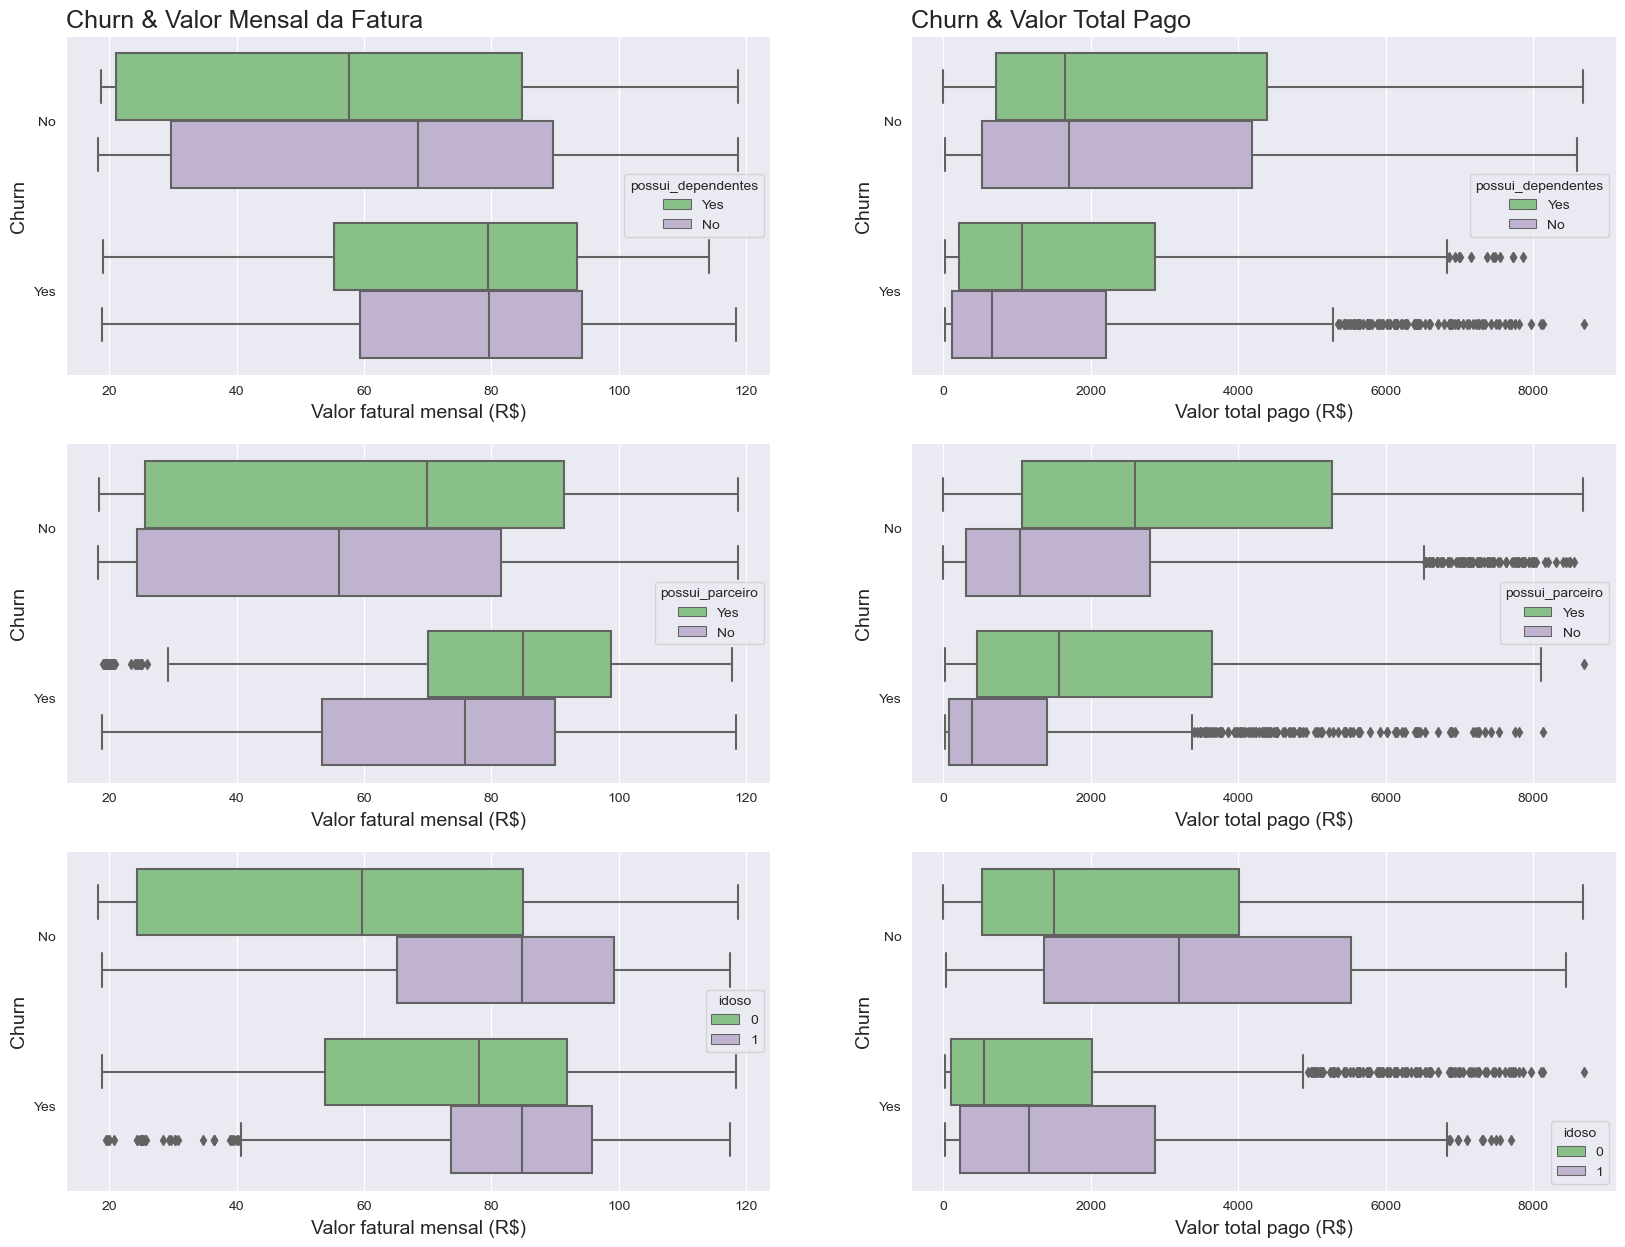

In [38]:
fig, axs = plt.subplots(3,2,figsize=(20,15))

sns.boxplot(x='valor_fatura_mensal',y='churn',hue='possui_dependentes',data=dados_normalizados, ax=axs[0,0])
sns.boxplot(x='valor_total_pago',y='churn',hue='possui_dependentes',data=dados_normalizados, ax=axs[0,1])
sns.boxplot(x='valor_fatura_mensal',y='churn',hue='possui_parceiro',data=dados_normalizados, ax=axs[1,0])
sns.boxplot(x='valor_total_pago',y='churn',hue='possui_parceiro',data=dados_normalizados, ax=axs[1,1])
sns.boxplot(x='valor_fatura_mensal',y='churn',hue='idoso',data=dados_normalizados, ax=axs[2,0])
sns.boxplot(x='valor_total_pago',y='churn',hue='idoso',data=dados_normalizados, ax=axs[2,1])

axs[0,0].set_title('Churn & Valor Mensal da Fatura', fontsize=18, loc='left')
axs[0,0].set_xlabel('Valor fatural mensal (R$)', fontsize=14)
axs[0,0].set_ylabel('Churn', fontsize=14)
axs[0,1].set_title('Churn & Valor Total Pago', fontsize=18, loc='left')
axs[0,1].set_xlabel('Valor total pago (R$)', fontsize=14)
axs[0,1].set_ylabel('Churn', fontsize=14)
axs[1,0].set_xlabel('Valor fatural mensal (R$)', fontsize=14)
axs[1,0].set_ylabel('Churn', fontsize=14)
axs[1,1].set_xlabel('Valor total pago (R$)', fontsize=14)
axs[1,1].set_ylabel('Churn', fontsize=14)
axs[2,0].set_xlabel('Valor fatural mensal (R$)', fontsize=14)
axs[2,0].set_ylabel('Churn', fontsize=14)
axs[2,1].set_xlabel('Valor total pago (R$)', fontsize=14)
axs[2,1].set_ylabel('Churn', fontsize=14)

plt.show()

Entre as features testadas, a presença de dependentes não causa grande impacto sobre as faturas pagas, ao contrário de clientes com parceiros e idosos. Idosos e casais tendem a permanecer mais tempo em casa e consequentemente assistir mais à tv.

### Correlação

Entre as variáveis numéricas da base de dados, podemos analisar as correlações entre o tempo de contrato e os valores pagos.

In [39]:
correlacoes = dados_normalizados[['meses_contrato', 'valor_fatura_mensal', 'valor_total_pago', 'valor_gasto_diario']].corr().round(3)
correlacoes.round(3).style.format('{:.3f}')\
                          .applymap(lambda x: f"color: {'darkblue' if x>=0.8 and x<1 else 'white'}", subset=['meses_contrato',	'valor_fatura_mensal',	'valor_total_pago',	'valor_gasto_diario'])\
                          .applymap(lambda x: f"font-weight: {'bold' if x>=0.8 and x<1 else 'normal'}", subset=['meses_contrato',	'valor_fatura_mensal',	'valor_total_pago',	'valor_gasto_diario'])

,meses_contrato,valor_fatura_mensal,valor_total_pago,valor_gasto_diario
meses_contrato,1.000,0.248,0.826,0.248
valor_fatura_mensal,0.248,1.000,0.651,1.000
valor_total_pago,0.826,0.651,1.000,0.651
valor_gasto_diario,0.248,1.000,0.651,1.000


Pela tabela, podemos observar que as variáveis tempo de contrato e valor total pago possuem uma correlação mais forte.

https://cursos.alura.com.br/course/machine-learning-classificacao-tras-panos/task/107926  - dados desbalanceados

# Semana 3 - Modelo de Classificação de Churn

## Encoding das variáveis categóricas

In [40]:
dados_normalizados.head()

,id_cliente,churn,genero,idoso,possui_parceiro,possui_dependentes,meses_contrato,assina_telefone,linhas_multiplas,aasinatura_provedor_internet,assinatura_seguranca,assinatura_backup,assinatura_protecao_dispositivo,assinatura_suporte_tecnico,assinatura_tv_cabo,assinatura_streaming_filmes,tipo_contrato,fatura_online,forma_pagamento,valor_fatura_mensal,valor_total_pago,valor_gasto_diario
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


In [41]:
map_geral = {
    'Yes':1,
    'No':0,
    'Male':1,
    'Female':0
}
    
dados_map_geral = dados_normalizados[['churn','genero','possui_parceiro','possui_dependentes','assina_telefone','fatura_online']].replace(map_geral)
dummies = pd.get_dummies(dados_normalizados.drop(['id_cliente','churn','possui_parceiro','possui_dependentes','assina_telefone','fatura_online','genero'], axis='columns'))
dados_encoding = pd.concat([dados_map_geral, dummies], axis='columns')
dados_encoding.head()

,churn,genero,possui_parceiro,possui_dependentes,assina_telefone,fatura_online,idoso,meses_contrato,valor_fatura_mensal,valor_total_pago,valor_gasto_diario,linhas_multiplas_No,linhas_multiplas_No phone service,linhas_multiplas_Yes,aasinatura_provedor_internet_DSL,aasinatura_provedor_internet_Fiber optic,aasinatura_provedor_internet_No,assinatura_seguranca_No,assinatura_seguranca_No internet service,assinatura_seguranca_Yes,assinatura_backup_No,assinatura_backup_No internet service,assinatura_backup_Yes,assinatura_protecao_dispositivo_No,assinatura_protecao_dispositivo_No internet service,assinatura_protecao_dispositivo_Yes,assinatura_suporte_tecnico_No,assinatura_suporte_tecnico_No internet service,assinatura_suporte_tecnico_Yes,assinatura_tv_cabo_No,assinatura_tv_cabo_No internet service,assinatura_tv_cabo_Yes,assinatura_streaming_filmes_No,assinatura_streaming_filmes_No internet service,assinatura_streaming_filmes_Yes,tipo_contrato_Month-to-month,tipo_contrato_One year,tipo_contrato_Two year,forma_pagamento_Bank transfer (automatic),forma_pagamento_Credit card (automatic),forma_pagamento_Electronic check,forma_pagamento_Mailed check
0,0,0,1,1,1,1,0,9,65.6,593.30,2.19,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1
1,0,1,0,0,1,0,0,9,59.9,542.40,2.00,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1
2,1,1,0,0,1,1,0,4,73.9,280.85,2.46,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
3,1,1,1,0,1,1,1,13,98.0,1237.85,3.27,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0
4,1,0,1,0,1,1,1,3,83.9,267.40,2.80,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1


## Verificando o balanceamento da variável target

Text(0, 0.5, 'Quantidade de clientes')

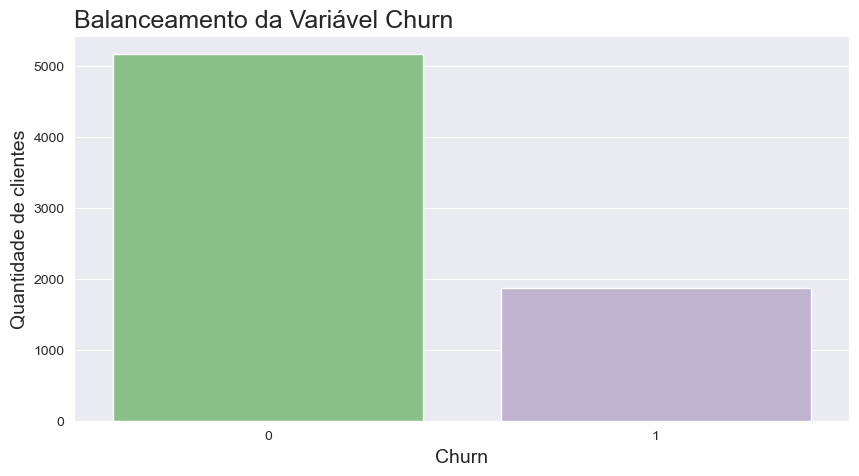

In [42]:
ax = sns.countplot(x='churn', data=dados_encoding)
ax.figure.set_size_inches(10,5)
ax.set_title('Balanceamento da Variável Churn', fontsize=18, loc='left')
ax.set_xlabel('Churn', fontsize=14)
ax.set_ylabel('Quantidade de clientes', fontsize=14)


Há mais do que o dobro de ocorrências de churn não do que sim. Isso pode prejudicar o aprendizado dos modelos de classificação, de forma que haverá mais dados de churn não para o modelo.

In [43]:
X = dados_encoding.drop('churn', axis='columns')
y = dados_encoding.churn
seed = 100

from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=seed)
X, y = smt.fit_resample(X, y)

dados_balanceados = pd.concat([X, y], axis='columns')
dados_balanceados.head()

,genero,possui_parceiro,possui_dependentes,assina_telefone,fatura_online,idoso,meses_contrato,valor_fatura_mensal,valor_total_pago,valor_gasto_diario,linhas_multiplas_No,linhas_multiplas_No phone service,linhas_multiplas_Yes,aasinatura_provedor_internet_DSL,aasinatura_provedor_internet_Fiber optic,aasinatura_provedor_internet_No,assinatura_seguranca_No,assinatura_seguranca_No internet service,assinatura_seguranca_Yes,assinatura_backup_No,assinatura_backup_No internet service,assinatura_backup_Yes,assinatura_protecao_dispositivo_No,assinatura_protecao_dispositivo_No internet service,assinatura_protecao_dispositivo_Yes,assinatura_suporte_tecnico_No,assinatura_suporte_tecnico_No internet service,assinatura_suporte_tecnico_Yes,assinatura_tv_cabo_No,assinatura_tv_cabo_No internet service,assinatura_tv_cabo_Yes,assinatura_streaming_filmes_No,assinatura_streaming_filmes_No internet service,assinatura_streaming_filmes_Yes,tipo_contrato_Month-to-month,tipo_contrato_One year,tipo_contrato_Two year,forma_pagamento_Bank transfer (automatic),forma_pagamento_Credit card (automatic),forma_pagamento_Electronic check,forma_pagamento_Mailed check,churn
0,0,1,1,1,1,0,9,65.6,593.30,2.19,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0
1,1,0,0,1,0,0,9,59.9,542.40,2.00,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0
2,1,0,0,1,1,0,4,73.9,280.85,2.46,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1
3,1,1,0,1,1,1,13,98.0,1237.85,3.27,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1
4,0,1,0,1,1,1,3,83.9,267.40,2.80,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,1


## Aplicando modelos de classificação

### Modelo Baseline

In [55]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(seed)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=seed, stratify=y)
modelo_dummy_baseline = DummyClassifier(strategy='most_frequent')
modelo_dummy_baseline.fit(X_treino, y_treino)
previsoes_dummy = modelo_dummy_baseline.predict(X_teste)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print(confusion_matrix(y_teste, previsoes_dummy))
print('Acurácia modelo Dummy de Baseline:', accuracy_score(y_teste, previsoes_dummy).round(4))
print('Precisão modelo KNN:', precision_score(y_teste, previsoes_dummy).round(4))


[[   0 1553]
 [   0 1552]]
Acurácia modelo Dummy de Baseline: 0.4998
Precisão modelo KNN: 0.4998


### KNN

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

normalizar = StandardScaler()
X_normalizado = normalizar.fit_transform(X)
np.random.seed(seed)
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=seed, stratify=y)
modelo_knn = KNeighborsClassifier(metric='euclidean')
modelo_knn.fit(X_treino, y_treino)
previsoes_knn = modelo_knn.predict(X_teste)

print(confusion_matrix(y_teste, previsoes_knn))
print('Acurácia modelo KNN:', accuracy_score(y_teste, previsoes_knn).round(4))
print('Precisão modelo KNN:', precision_score(y_teste, previsoes_knn).round(4))

[[1271  282]
 [ 248 1304]]
Acurácia modelo KNN: 0.8293
Precisão modelo KNN: 0.8222


c:\Users\lucas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Árvore de Decisão

In [46]:
from sklearn.tree import DecisionTreeClassifier

np.random.seed(seed)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=seed, stratify=y)
modelo_tree = DecisionTreeClassifier(criterion='entropy', random_state=seed)
modelo_tree.fit(X_treino, y_treino)
previsoes_tree = modelo_tree.predict(X_teste)

print(confusion_matrix(y_teste, previsoes_tree))
print('Acurácia modelo Tree:', accuracy_score(y_teste, previsoes_tree).round(4))
print('Precisão modelo Tree:', precision_score(y_teste, previsoes_tree).round(4))

[[1242  311]
 [ 259 1293]]
Acurácia modelo Tree: 0.8164
Precisão modelo Tree: 0.8061


In [47]:
# from sklearn.tree import export_graphviz
# import graphviz

# dot_data = export_graphviz(modelo_tree, out_file=None, feature_names=X.columns, filled=True, rounded=True, class_names=['Não', 'Sim'])
# plot = graphviz.Source(dot_data)
# plot

### Naive Bayes

In [48]:
from sklearn.naive_bayes import BernoulliNB

median_abs = np.abs(np.median(X_treino))
median_abs
np.random.seed(seed)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=seed, stratify=y)
modelo_nb = BernoulliNB(binarize=median_abs)
modelo_nb.fit(X_treino, y_treino)
previsoes_nb = modelo_nb.predict(X_teste)

print(confusion_matrix(y_teste, previsoes_nb))
print('Acurácia modelo Naive Bayes:', accuracy_score(y_teste, previsoes_nb).round(4))
print('Precisão modelo Naive Bayes:', precision_score(y_teste, previsoes_nb).round(4))

[[1106  447]
 [ 186 1366]]
Acurácia modelo Naive Bayes: 0.7961
Precisão modelo Naive Bayes: 0.7534


### SVC

In [49]:
from sklearn.svm import SVC

np.random.seed(seed)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=seed, stratify=y)
modelo_svc = SVC(gamma='auto')
modelo_svc.fit(X_treino, y_treino)
previsoes_svc = modelo_svc.predict(X_teste)

print(confusion_matrix(y_teste, previsoes_svc))
print('Acurácia modelo SVC:', accuracy_score(y_teste, previsoes_svc).round(4))
print('Precisão modelo SVC:', precision_score(y_teste, previsoes_svc).round(4))

[[1253  300]
 [ 319 1233]]
Acurácia modelo SVC: 0.8006
Precisão modelo SVC: 0.8043


Utilizando features padronizadas

In [56]:
np.random.seed(seed)
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=seed, stratify=y)
modelo_svc = SVC(gamma='auto')
modelo_svc.fit(X_treino, y_treino)
previsoes_svc = modelo_svc.predict(X_teste)

print(confusion_matrix(y_teste, previsoes_svc))
print('Acurácia modelo SVC:', accuracy_score(y_teste, previsoes_svc).round(4))
print('Precisão modelo SVC:', precision_score(y_teste, previsoes_svc).round(4))
# modelo_svc.score(X_teste, y_teste) - avaliar quando usar este e a acurácia?

[[1355  198]
 [ 259 1293]]
Acurácia modelo SVC: 0.8528
Precisão modelo SVC: 0.8672


0.8528180354267311

Entre todos os modelos utilizados, o algoritmo SVC com dados padronizados obteve o melhor resultado.

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

normalizar = StandardScaler()
X_normalizado = normalizar.fit_transform(X)
np.random.seed(seed)
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=seed, stratify=y)
modelo_knn = KNeighborsClassifier(metric='euclidean')
modelo_knn.fit(X_treino, y_treino)
previsoes_knn = modelo_knn.predict(X_teste)

print(confusion_matrix(y_teste, previsoes_knn))
print('Acurácia modelo KNN:', accuracy_score(y_teste, previsoes_knn).round(4))
print('Precisão modelo KNN:', precision_score(y_teste, previsoes_knn).round(4))
print('-----------------------------------------')

from sklearn.tree import DecisionTreeClassifier

np.random.seed(seed)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=seed, stratify=y)
modelo_tree = DecisionTreeClassifier(criterion='entropy', random_state=seed)
modelo_tree.fit(X_treino, y_treino)
previsoes_tree = modelo_tree.predict(X_teste)

print(confusion_matrix(y_teste, previsoes_tree))
print('Acurácia modelo Tree:', accuracy_score(y_teste, previsoes_tree).round(4))
print('Precisão modelo Tree:', precision_score(y_teste, previsoes_tree).round(4))
print('-----------------------------------------')

from sklearn.naive_bayes import BernoulliNB

median_abs = np.abs(np.median(X_treino))
median_abs
np.random.seed(seed)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=seed, stratify=y)
modelo_nb = BernoulliNB(binarize=median_abs)
modelo_nb.fit(X_treino, y_treino)
previsoes_nb = modelo_nb.predict(X_teste)

print(confusion_matrix(y_teste, previsoes_nb))
print('Acurácia modelo Naive Bayes:', accuracy_score(y_teste, previsoes_nb).round(4))
print('Precisão modelo Naive Bayes:', precision_score(y_teste, previsoes_nb).round(4))
print('-----------------------------------------')

from sklearn.svm import SVC

np.random.seed(seed)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=seed, stratify=y)
modelo_svc = SVC(gamma='auto')
modelo_svc.fit(X_treino, y_treino)
previsoes_svc = modelo_svc.predict(X_teste)

print(confusion_matrix(y_teste, previsoes_svc))
print('Acurácia modelo SVC:', accuracy_score(y_teste, previsoes_svc).round(4))
print('Precisão modelo SVC:', precision_score(y_teste, previsoes_svc).round(4))
print('-----------------------------------------')

np.random.seed(seed)
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=seed, stratify=y)
modelo_svc = SVC(gamma='auto')
modelo_svc.fit(X_treino, y_treino)
previsoes_svc = modelo_svc.predict(X_teste)

print(confusion_matrix(y_teste, previsoes_svc))
print('Acurácia modelo SVC com features padronizadas:', accuracy_score(y_teste, previsoes_svc).round(4))
print('Precisão modelo SVC com features padronizadas:', precision_score(y_teste, previsoes_svc).round(4))

c:\Users\lucas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[1271  282]
 [ 248 1304]]
Acurácia modelo KNN: 0.8293
Precisão modelo KNN: 0.8222
-----------------------------------------
[[1242  311]
 [ 259 1293]]
Acurácia modelo Tree: 0.8164
Precisão modelo Tree: 0.8061
-----------------------------------------
[[1106  447]
 [ 186 1366]]
Acurácia modelo Naive Bayes: 0.7961
Precisão modelo Naive Bayes: 0.7534
-----------------------------------------
[[1253  300]
 [ 319 1233]]
Acurácia modelo SVC: 0.8006
Precisão modelo SVC: 0.8043
-----------------------------------------
[[1355  198]
 [ 259 1293]]
Acurácia modelo SVC com features padronizadas: 0.8528
Precisão modelo SVC com features padronizadas: 0.8672
